```{include} ../math-definitions.md
```

In [1]:
from bccr import SW
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
import statsmodels.api as sm

# Series de tiempo
## Definición de serie de tiempo

Una serie de tiempo es una colección de observaciones indexadas por la fecha de cada observación, denotada por $y_t$
\begin{equation*}
y_1, y_2, \dots, y_T
\end{equation*}

En la práctica se asume que lo anterior es sólo una muestra, pero que la serie pudo haber sido observada en más períodos.
\begin{equation*}
\dots, y_{-1}, y_0, \alert{y_1, y_2, \dots, y_T}, y_{T+1}, y_{T+2}, \dots
\end{equation*}







Así, vemos a una serie de tiempo como **una realización** del proceso estocástico $\{Y_t\}^\infty_{t=-\infty}$, de la cual solo tenemos observaciones para $t$ entre 1 y $T$.




## Serie de tiempo estacionaria
Una serie de tiempo estacionaria es una realización de un proceso estocástico estacionario.

```{figure} ../../imgs/serie-estacionaria.png

Una serie estacionaria
```


## Serie de tiempo no estacionaria
Una serie de tiempo no estacionaria es una realización de un proceso estocástico no estacionario.

```{figure} ../../imgs/serie-no-estacionaria.png

Una serie no estacionaria
```



## Casos particulares de series de tiempo

::::{grid}
:gutter: 3

:::{grid-item-card} Tendencia
\begin{equation*}
y_t = t
\end{equation*}
:::

:::{grid-item-card} Constante
\begin{equation*}
y_t = c
\end{equation*}
:::

:::{grid-item-card} Ruido blanco de Gauss
\begin{equation*}
y_t = \epsilon_t, \text{ con } \left(\epsilon_t\right)_{t=-\infty}^{\infty} i.i.d., \epsilon_t\sim N(0,\sigma^2)
\end{equation*}
:::
::::



## Infiriendo los momentos del proceso estocástico


Suponga que tenemos un número grande $n$ de realizaciones independientes del proceso estocástico $\{Y_t\}^T_{t=1}$, y que deseamos estimar el valor del momento no central $\mu'_{k,t} \equiv \E[Y^k_t]$. Utilizando [la ley de los grandes números](appendix:grandes-numeros), podemos estimarlo así

\begin{equation*}
\hat{\mu'}_{k,t} = \frac{y^k_{t,1} + y^k_{t,2} + \dots y^k_{t,n}}{n}
\end{equation*}

En la práctica, sólo tenemos una única realización del proceso: $y_1, y_2, \dots, y_T$.

¿Podemos estimar $\mu'_{k,t}$ a partir de $\overline{y^k} = \frac{y^k_{1} + y^k_{2} + \dots y^k_{T}}{T}$? En general no, a menos que el proceso estocástico sea

1.  estacionario
2.  ergódico (para el momento $k$).


## Ergodicidad
En el caso de procesos estacionarios, el supuesto de **ergodicidad** significa que momentos muestrales calculados a partir de una serie de tiempo con un número finito de observaciones converge (en algún sentido) a sus contrapartes poblacionales.





::::{grid}
:gutter: 3

:::{grid-item-card} Ergódico en media
El proceso es ergódico en media si
\begin{equation*}
\lim\limits_{T\to\infty}\E\left[\left(\tfrac{1}{T}\sum_{t=1}^{T}y_t - \mu \right)^2\right] = 0
\end{equation*}
:::

:::{grid-item-card} Ergódico en varianza
El proceso es ergódico en varianza si
\begin{equation*}
\lim\limits_{T\to\infty}\E\left[\left(\tfrac{1}{T}\sum_{t=1}^{T}(y_t - \mu)^2 - \sigma^2_y \right)^2\right] = 0
\end{equation*}
:::
::::

## Algunas apuntes acerca de la ergodicidad

*  Las condiciones de ergodicidad son “propiedades de consistencia” para variables aleatorias dependientes, y no pueden ser evaluadas. Por ello, deben ser asumidas.
*  No podemos usar la ley de los grandes números para probar ergodicidad, porque las distribuciones de distintos momentos $t$ pueden ser idénticas, pero en general no son independientes.
*  Un proceso no estacionario no puede ser ergódico: ¿a los momentos de cuál variable $Y_t$ convergerían los momentos muestrales si los poblacionales no fueran constantes?


## Estimación de  momentos de un proceso estacionario
Si el proceso es ergódico, podemos estimar consistentemente:

::::{grid}
:gutter: 3

:::{grid-item-card} Media
\begin{equation*}
\hat{\mu} = \frac{1}{T}\sum\limits_{t=1}^{T}y_t
\end{equation*}
:::

:::{grid-item-card} Varianza
\begin{equation*}
\hat{\gamma}_0 = \frac{1}{T}\sum\limits_{t=1}^{T}(y_t - \hat{\mu})^2
\end{equation*}
:::

:::{grid-item-card} Autocovarianza
\begin{equation*}
\hat{\gamma}_\tau = \frac{1}{T}\sum\limits_{t=1}^{T-\tau}(y_t - \hat{\mu})(y_{t+\tau} - \hat{\mu})
\end{equation*}
:::

:::{grid-item-card} Autocorrelación
\begin{equation*}
\hat{\rho}_\tau = \frac{\hat{\gamma}_\tau}{\hat{\gamma}_0} \quad \text{para } \tau = 1, 2,\dots T-1.
\end{equation*}
:::

:::{grid-item-card} Asimetría
\begin{equation*}
\hat{S} = \frac{\frac{1}{T}\sum\limits_{t=1}^{T}(y_t - \hat{\mu})^3}{\sqrt{\hat{\gamma}_0^3}}
\end{equation*}
:::

:::{grid-item-card} Kurtosis
\begin{equation*}
\hat{K} = \frac{\frac{1}{T}\sum\limits_{t=1}^{T}(y_t - \hat{\mu})^4}{\hat{\gamma}_0^2}
\end{equation*}
:::
::::


-----------------------------------------------

## Autocorrelación


Es imposible evaluar qué tan fuerte es la dependencia de variables de un proceso estocástico a partir de las autocovarianzas, porque éstas dependen de las unidades de medida de la serie. Por ello, utilizamos las **autocorrelaciones**, que se obtienen de dividir las autocovarinzas por la varianza del proceso.

Si el proceso es estacionario se cumple que:

*  $\rho_0 = 1$
*  $\rho_\tau = \rho_{-\tau}$
*  $\left|\rho_\tau\right|\leq 1$ para todo $\tau$.

LLamamos **autocorrelograma** a la secuencia de autocorrelaciones $\rho_\tau$, vista como función del número de rezagos $\tau$.




## Autocorrelación muestral

En la práctica, a partir de una muestra estimaremos la **autocorrelación muestral**.

Como nuestra muestra es finita, los valores estimados no necesariamente coincidirán con los poblacionales. Por ello, nos interesa especialmente saber cuándo estas autocorrelaciones son significativamente distintas de cero.  Según Bartlett (1946), la varianza de los coeficientes de autocorrelación en los cuales $\rho_{k+1}, \rho_{k+2}, \dots = 0$ está dada por
\begin{equation*}
V\left[\hat{\rho}(\tau)\right] \approx \frac{1}{T}\left(1+2\sum_{j=1}^k\rho(j)^2\right)
\end{equation*}


## Autocorrelación parcial
<!--  \nocite{Hamilton:1994  %Hamilton 1994, p.111-112 -->

La $m$-ésima autocorrelación parcial $\hat{a}_m^{(m)}$ se estima por OLS como el último coeficiente de una regresión de $y$ en una constante y sus $m$ valores más recientes:

\begin{equation*}
y_t = c + \hat{a}_1^{(m)}y_{t-1} + \hat{a}_2^{(m)}y_{t-2} + \dots + \hat{a}_m^{(m)}y_{t-m} +\hat{\epsilon_{t+1}}
\end{equation*}

La idea es medir el efecto **directo** de, por ejemplo, $y_{t-1}$ sobre $y_{t+1}$, controlando por el efecto indirecto que $y_{t-1}$ pueda tener sobre $y_{t+1}$ a través de $y_{t}$.

Si los datos están generados por un proceso AR(p), entonces el estimador $\hat{a}_m^{(m)}$ tiene una varianza alrededor del verdadero valor (cero) aproximada por

\begin{equation*}
\Var\left[\hat{a}_m^{(m)}\right] \approx\frac{1}{T} \qquad\text{ para } m = p+1,p+2, \dots
\end{equation*}

{{ empieza_ejemplo }} Autocorrelograma del IMAE {{ fin_titulo_ejemplo }}

```{margin} Archivos
* log_imae.csv
* correlogram.ipynb
* correlogram.do
* correlogram.prg
* correlogram.R
```
Obtenemos y graficamos los datos

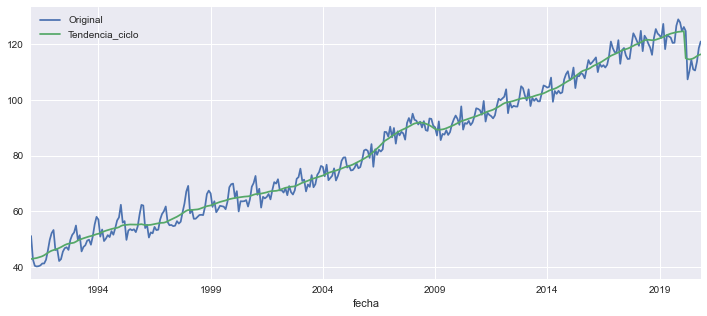

In [2]:
imae = SW(Original=35449, Tendencia_ciclo=35553)
imae.plot(figsize=[12,5]);

In [3]:
plot_acf = sm.graphics.tsa.plot_acf
plot_pacf = sm.graphics.tsa.plot_pacf
log_imae = np.log(imae)

Hacemos los autocorrelogramas

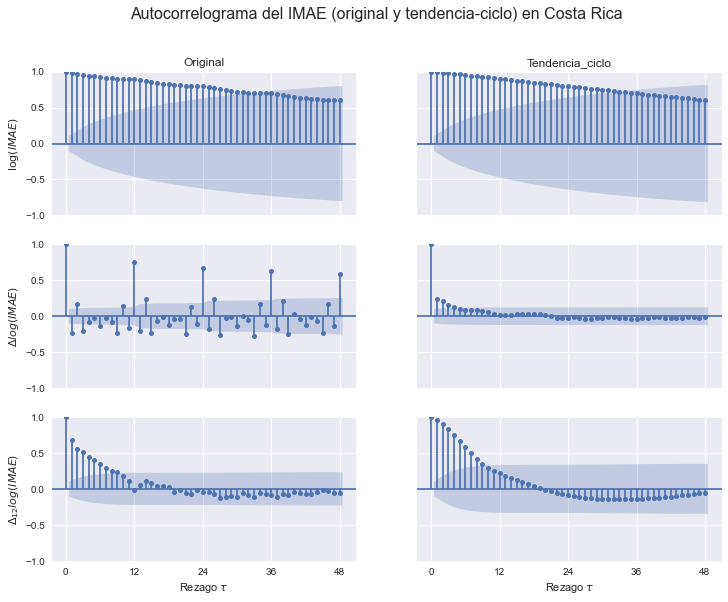

In [4]:
OPCIONES = dict(lags=48, alpha=0.05, title='')

fig, axs = plt.subplots(3,2, figsize=[12,9], sharex=True, sharey=True)

for indic, ax in zip(imae, axs.T):
    plot_acf(log_imae[indic].dropna(), ax=ax[0], **OPCIONES);
    plot_acf(log_imae[indic].diff().dropna(), ax=ax[1], **OPCIONES);
    plot_acf(log_imae[indic].diff(12).dropna(), ax=ax[2], **OPCIONES);

for indic, ax in zip(imae, axs[0]):
    ax.set_title(indic)

for ax in axs[-1]:
    ax.set_xlabel(r'Rezago $\tau$')
    ax.set_xticks(np.arange(0,49,12));

axs[0,0].set_ylabel(r'$\log(IMAE)$')
axs[1,0].set_ylabel(r'$\Delta log(IMAE)$')
axs[2,0].set_ylabel(r'$\Delta_{12} log(IMAE)$')

fig.suptitle('Autocorrelograma del IMAE (original y tendencia-ciclo) en Costa Rica', size=16);

Hacemos los autocorrelogramas parciales

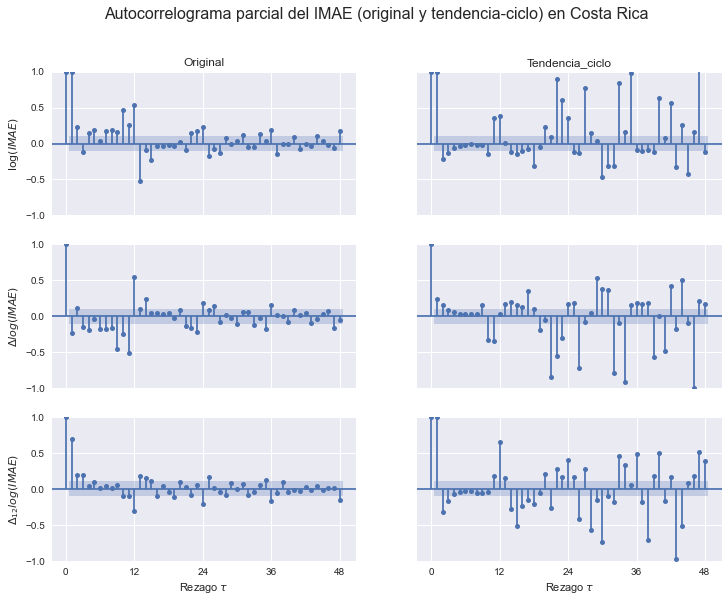

In [5]:
OPCIONES = dict(lags=48, alpha=0.05, title='', method='ols')

fig, axs = plt.subplots(3,2, figsize=[12,9], sharex=True, sharey=True)

for indic, ax in zip(imae, axs.T):
    plot_pacf(log_imae[indic].dropna(), ax=ax[0], **OPCIONES);
    plot_pacf(log_imae[indic].diff().dropna(), ax=ax[1], **OPCIONES);
    plot_pacf(log_imae[indic].diff(12).dropna(), ax=ax[2], **OPCIONES);

for indic, ax in zip(imae, axs[0]):
    ax.set_title(indic)

for ax in axs[-1]:
    ax.set_xlabel(r'Rezago $\tau$')
    ax.set_xticks(np.arange(0,49,12));

axs[0,0].set_ylabel(r'$\log(IMAE)$')
axs[1,0].set_ylabel(r'$\Delta log(IMAE)$')
axs[2,0].set_ylabel(r'$\Delta_{12} log(IMAE)$')

fig.suptitle('Autocorrelograma parcial del IMAE (original y tendencia-ciclo) en Costa Rica', size=16);

{{ termina_ejemplo }}